In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from network_models.erdos_renyi_network import erdos_renyi_network
from network_models.scale_free_network import scale_free_network

In [139]:
def make_nx_graph(N, gamma, c):
    # Outputs the networkx.Graph of the graph
    alpha = 1 / (gamma - 1)
    w = np.arange(1., N + 1)**(-alpha)
    w *= c * N / w.sum()
    s = np.sum(w)
    m = (np.dot(w, w)/s)**2 + s
    m = int(m / 2)
    wsum = np.cumsum(w)
    wsum = np.insert(wsum, 0, 0)
    wsum = wsum / wsum[-1]
    I = np.digitize(np.random.rand(m, 1), wsum)
    J = np.digitize(np.random.rand(m, 1), wsum)
    G = nx.Graph()
    G.add_nodes_from(range(N))
    G.add_edges_from(tuple(zip(I.reshape(m,), J.reshape(m,))))
    return G

In [142]:
G = make_nx_graph(10000, 2.5, 3)

In [143]:
len(G), np.mean([d for _, d in G.degree])

(10000, 3.0478)

In [55]:
with open(r"C:\Users\kuzne\Documents\ACTIVE_PROJECTS\research\experiments\results.json", 'r') as f:
    j = json.load(f)
G = nx.Graph()
G.add_nodes_from(range(len(j['nodes'])))
for node in j['nodes']:
    props = j['nodes'][node]
    G.add_edges_from([(int(node), neighb) for neighb in props['neighbors']])

In [56]:
j

{'componentSize': [9, 1],
 'gccRoot': 1,
 'gccSize': 9,
 'nodes': {'0': {'componentID': 1, 'neighbors': [4, 9, 1, 5, 3]},
  '1': {'componentID': 1, 'neighbors': [5, 0, 2, 7, 4]},
  '2': {'componentID': 1, 'neighbors': [1, 4, 5]},
  '3': {'componentID': 1, 'neighbors': [5, 0, 4]},
  '4': {'componentID': 1, 'neighbors': [6, 0, 2, 3, 1]},
  '5': {'componentID': 1, 'neighbors': [1, 3, 0, 2]},
  '6': {'componentID': 1, 'neighbors': [4, 7]},
  '7': {'componentID': 1, 'neighbors': [1, 6]},
  '8': {'componentID': 2, 'neighbors': []},
  '9': {'componentID': 1, 'neighbors': [0]}},
 'numComponents': 2}

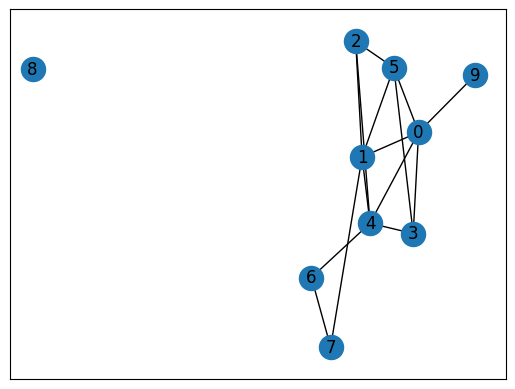

In [57]:
nx.draw_networkx(G)

In [90]:
N = 1000000
c = 7
gamma = 2.5
G = scale_free_network({
    'num_nodes': N,
    'mean_degree': c,
    'exponent': gamma,
})
# G = erdos_renyi_network({
#     'num_nodes': 1000,
#     'mean_degree': 4,
# })

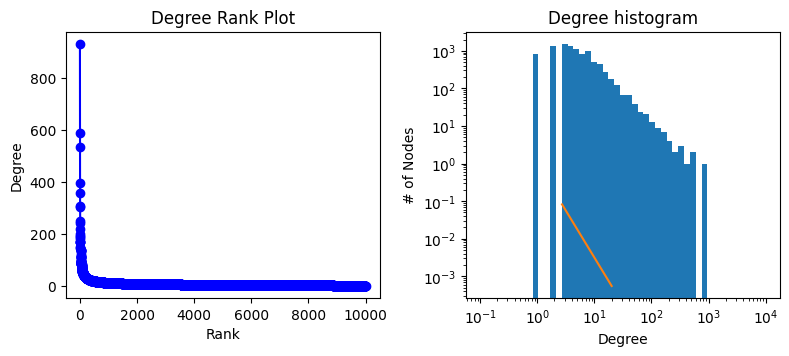

In [4]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

# ax0 = fig.add_subplot(axgrid[0:3, :])
# Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
# pos = nx.spring_layout(Gcc, seed=10396953)
# nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
# nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
# ax0.set_title("Connected components of G")
# ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
# ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.hist(degree_sequence, bins=np.logspace(np.log10(0.1), np.log10(len(G)), 50))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.plot(np.exp(np.arange(1, np.log10(len(G)))), np.exp(-2.5 * np.arange(1, np.log10(len(G)))))

fig.tight_layout()
plt.show()

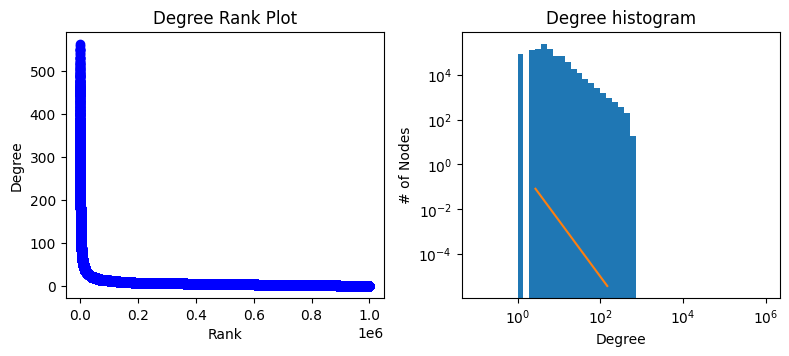

In [92]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

# ax0 = fig.add_subplot(axgrid[0:3, :])
# Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
# pos = nx.spring_layout(Gcc, seed=10396953)
# nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
# nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
# ax0.set_title("Connected components of G")
# ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
# ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.hist(degree_sequence, bins=np.logspace(np.log10(0.1), np.log10(len(G)), 50))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.plot(np.exp(np.arange(1, np.log10(len(G)))), np.exp(-2.5 * np.arange(1, np.log10(len(G)))))

fig.tight_layout()
plt.show()

In [93]:
mean_degree = np.mean([d for _, d in G.degree])
mean_degree, c

(7.0, 7)